<a href="https://colab.research.google.com/github/Odhiambo0/gittutorial/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
df = pd.read_csv("Hotel_Reviews.csv")


In [7]:
print(df.head())

                                       Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                     

In [8]:
print(df.tail())

                                           Hotel_Address  \
85511  2 8 Great Suffolk Street Southwark London SE1 ...   
85512  2 8 Great Suffolk Street Southwark London SE1 ...   
85513  2 8 Great Suffolk Street Southwark London SE1 ...   
85514  2 8 Great Suffolk Street Southwark London SE1 ...   
85515  2 8 Great Suffolk Street Southwark London SE1 ...   

       Additional_Number_of_Scoring Review_Date  Average_Score  \
85511                           570   5/22/2017            9.3   
85512                           570   5/22/2017            9.3   
85513                           570   5/18/2017            9.3   
85514                           570   5/16/2017            9.3   
85515                           570   5/15/2017            9.3   

                   Hotel_Name        Reviewer_Nationality  \
85511  Hilton London Bankside             United Kingdom    
85512  Hilton London Bankside             United Kingdom    
85513  Hilton London Bankside             United Kingdom   

In [9]:
print(df.info)

<bound method DataFrame.info of                                            Hotel_Address  \
0       s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1       s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2       s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3       s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4       s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
...                                                  ...   
85511  2 8 Great Suffolk Street Southwark London SE1 ...   
85512  2 8 Great Suffolk Street Southwark London SE1 ...   
85513  2 8 Great Suffolk Street Southwark London SE1 ...   
85514  2 8 Great Suffolk Street Southwark London SE1 ...   
85515  2 8 Great Suffolk Street Southwark London SE1 ...   

       Additional_Number_of_Scoring Review_Date  Average_Score  \
0                               194    8/3/2017            7.7   
1                               194    8/3/2017            7.7   
2                               194   7/31/2017  

In [12]:
print(df.columns.tolist())

['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date', 'Average_Score', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Positive_Review', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags', 'days_since_review', 'lat', 'lng']


In [13]:
print(df.isnull().sum().sum())

7


In [14]:
print(df.duplicated().sum())

33


In [18]:
df.dropna(inplace = True)

In [20]:
print(df.isnull().sum().sum())

0


In [21]:
df.drop_duplicates(inplace = True)



In [22]:
print(df.duplicated().sum())


0


In [23]:
df["Reviews"] = df["Negative_Review"] + " " + df["Positive_Review"]



In [24]:
# Label reviews: 1 for Positive, 0 for Negative
df['Sentiment'] = df.apply(lambda x: 1 if len(x['Positive_Review'].strip()) > len(x['Negative_Review'].strip()) else 0, axis=1)


In [26]:
# Generate Word Clouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()



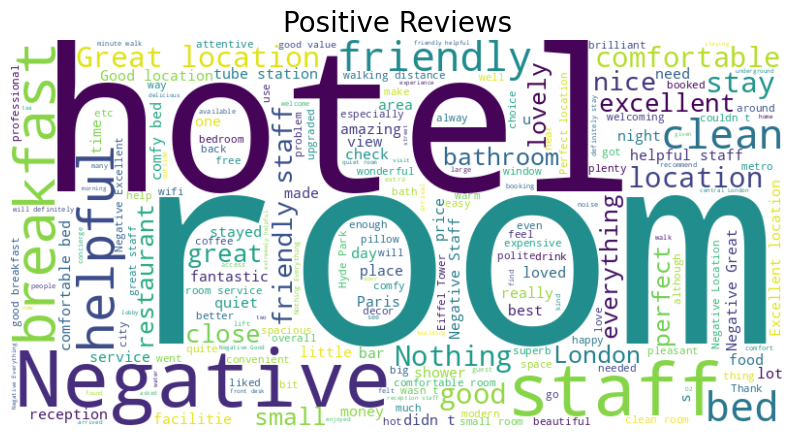

In [32]:
# Word clouds for positive and negative reviews
generate_wordcloud(df[df['Sentiment'] == 1]['Reviews'], "Positive Reviews")




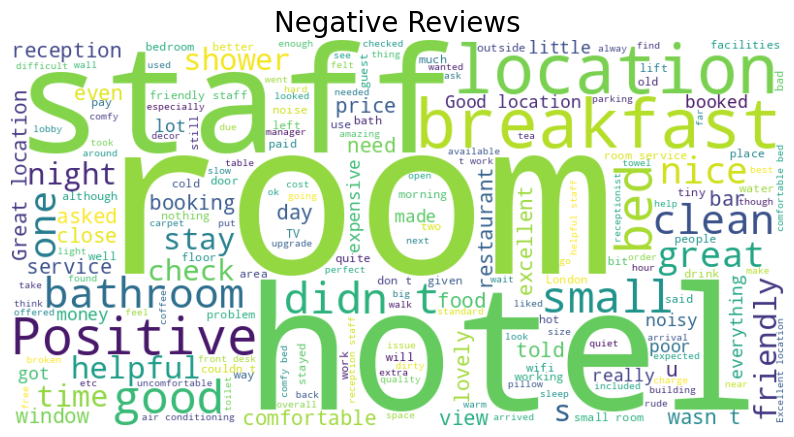

In [33]:
generate_wordcloud(df[df['Sentiment'] == 0]['Reviews'], "Negative Reviews")



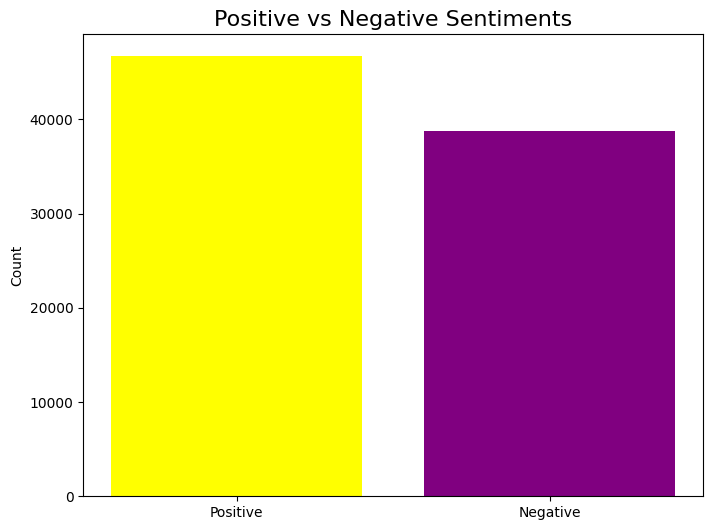

In [31]:
# Plot Positive vs Negative Sentiment Counts
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(['Positive', 'Negative'], sentiment_counts, color=['yellow', 'purple'])
plt.title('Positive vs Negative Sentiments', fontsize=16)
plt.ylabel('Count')
plt.show()

In [28]:
# Sentiment Analysis Model
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Sentiment'], test_size=0.3, random_state=42)

# Text Vectorization
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Naive Bayes Model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.822226554883993

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80     11712
           1       0.81      0.88      0.84     13933

    accuracy                           0.82     25645
   macro avg       0.82      0.82      0.82     25645
weighted avg       0.82      0.82      0.82     25645


Confusion Matrix:
 [[ 8863  2849]
 [ 1710 12223]]
